### Well56

Spencer Harris  
Data Analysis  
Fogland Point, Tiverton, Rhode Island, US

**The data is pressure/temperature/conductivity data collected in a domestic well at 30 minute intervals. There is also another data set that is composed of barometric pressure for compensation. The exact source of that data is from In-Situ AquaTroll 200s that I installed on Fogland Point, RI. The format of the data is CSV. Also the is Percipitation data being loaded in from a Wunderground Personal Weater Station nearby to compare against the water level data**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%pwd
#os.listdir()

'/home/sbhgeo/Documents/Fogland/Notebooks/Transducer_Data/Fogland'

In [3]:
# name/number of the well that we are looking at in this notebook
subject_well = '56'

In [4]:
# pulling in the hard measurements (water levels retrieved with water level sounder) and well TOC elevations
man_measures = pd.read_csv('../data/All_WLs.csv', delimiter=',')
# pulling in the transducer data
barofile = '../data/troll/2017-08-17_16-05-25_fogland-point_Log_baro081717.csv'
well56file = '../data/troll/2017-08-17_16-34-14_fogland-point_Log_56pointview081717.csv'
baro = pd.read_csv(barofile, skiprows=25)
well56 = pd.read_csv(well56file, skiprows=25)

In [5]:
#check for size of data
print (baro.shape, well56.shape)

(4122, 3) (4120, 6)


In [6]:
well56[:10]

,Date Time,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396)
0,2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000
1,2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952
2,2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478
3,2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998
4,2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461
5,2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309
6,2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015
7,2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686
8,2017-08-17 20:34:14.116,44.77082,12.10432,376.2101,499.1560,0.241475
9,2017-08-17 21:04:14.116,44.91403,12.10414,376.0754,498.9795,0.241387


Since the two data frames are of different sizes we need to inspect them and try to line/match them up temporally the best we can. This shouldn't be too hard because both of the files have one measurement every 30 minutes. If the two files' temporal resolution was different then it would be more difficult

In [7]:
baro[:10]

,Date Time,Pressure (psi) (525373),Temperature (°C) (525373)
0,2017-08-17 16:05:25.278,14.71757,20.58728
1,2017-08-17 16:35:25.278,14.71992,19.49414
2,2017-08-17 17:05:25.278,14.72049,18.43887
3,2017-08-17 17:35:25.278,14.71942,18.11523
4,2017-08-17 18:05:25.278,14.71662,18.02957
5,2017-08-17 18:35:25.278,14.72028,18.01942
6,2017-08-17 19:05:25.278,14.71957,17.98892
7,2017-08-17 19:35:25.278,14.72536,18.00272
8,2017-08-17 20:05:25.278,14.73132,18.00127
9,2017-08-17 20:35:25.278,14.72902,17.99982


In [8]:
well56[:10]

,Date Time,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396)
0,2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000
1,2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952
2,2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478
3,2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998
4,2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461
5,2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309
6,2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015
7,2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686
8,2017-08-17 20:34:14.116,44.77082,12.10432,376.2101,499.1560,0.241475
9,2017-08-17 21:04:14.116,44.91403,12.10414,376.0754,498.9795,0.241387


So if we inspect the data we note that the 0th row/measurement of `well56` actually matches up with the 1st row/measurement of `baro`  
If we shift `well56` by 1 row the two should match up quite nicely

In [9]:
#matching up our readings/indicies
well56 = well56.shift(1)

In [10]:
well56.columns

Index(['Date Time', 'Pressure (psi) (534396)', 'Temperature (°C) (534396)',
       'Actual Conductivity (µS/cm) (534396)',
       'Specific Conductivity (µS/cm) (534396)', 'Salinity (PSU) (534396)'],
      dtype='object')

**"manual" barometric compensation** derived from [In-Situ Inc.](https://in-situ.com/wp-content/uploads/2014/11/Manual-Level-Mode-Correction-for-Non-Vented-Sensors.pdf)  

Basic idea: Depth is the amount of water over the pressure sensor plus barometric pressure.  

Water level can be calculated in meters using the following equation: D = (0.703073 X (Pm-Bm)) / SG

In [11]:
well56['compd_(psi)']  = well56['Pressure (psi) (534396)'].sub(baro['Pressure (psi) (525373)'].squeeze())
well56['baro_reading'] = baro['Pressure (psi) (525373)']
Lr = man_measures
# Lr = reference level
well56['Transducer_level_ft'] = (well56['compd_(psi)'] * 2.30666) 
well56['water_level_ft_LMSL'] = (Lr.iloc[0][' TOC Elevation (LSML)']) - (well56['compd_(psi)'] * 2.30666)

Below the date/time is being converted into a format that Pandas can read and then it is being assigned as the index for the data frames

In [12]:
well56['Datetime'] = pd.to_datetime(well56['Date Time'], errors='coerce')
well56 = well56.set_index('Datetime')
well56 = well56.drop('Date Time', 1)

baro['Datetime'] = pd.to_datetime(baro['Date Time'], errors='coerce')
baro = baro.set_index('Datetime')
baro= baro.drop('Date Time', 1)

In [13]:
well56[:10]

,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL
Datetime,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,14.71757,NaN,NaN
2017-08-17 16:34:14.116,14.72115,24.40741,0.0000,0.0000,0.000000,0.00123,14.71992,0.002837,21.529063
2017-08-17 17:04:14.116,44.39252,12.11579,370.9738,492.0654,0.237952,29.67203,14.72049,68.443285,-46.911385
2017-08-17 17:34:14.116,44.40427,12.10703,374.7246,497.1508,0.240478,29.68485,14.71942,68.472856,-46.940956
2017-08-17 18:04:14.116,44.40371,12.10540,377.0114,500.2054,0.241998,29.68709,14.71662,68.478023,-46.946123
2017-08-17 18:34:14.116,44.39547,12.10496,377.7091,501.1367,0.242461,29.67519,14.72028,68.450574,-46.918674
2017-08-17 19:04:14.116,44.39802,12.10459,377.4746,500.8303,0.242309,29.67845,14.71957,68.458093,-46.926193
2017-08-17 19:34:14.116,44.50608,12.10487,377.0327,500.2404,0.242015,29.78072,14.72536,68.693996,-47.162096
2017-08-17 20:04:14.116,44.61566,12.10478,376.5337,499.5795,0.241686,29.88434,14.73132,68.933012,-47.401112


In [14]:
man_measures['Datetime'] = pd.to_datetime(man_measures['Date Time'])
man_measures = man_measures.set_index('Datetime')
man_measures= man_measures.drop(('Date Time'), 1)
man_measures= man_measures.drop(('date'), 1)
man_measures= man_measures.drop(('time'), 1)
# combine the above three lines into 1 using a list
man_measures.columns


Index(['well', 'lat ', 'lon', 'feet below TOC', ' TOC Elevation (LSML)',
       'Water level above LMSL'],
      dtype='object')

Below we have selected out the manual reading that pertain to the `subject_well` we are currently looking at  

The next level of efficency here would be to have the script automatically select where the transducer data matches with (is within 29 minutes) of a manual level.  

But we are just going to look above and pick which row corresponds with the first few transducer readings.

In [15]:
well56_measures = man_measures.loc[man_measures['well'].str.contains(subject_well)==True, : ]
well56_measures

,well,lat,lon,feet below TOC,TOC Elevation (LSML),Water level above LMSL
Datetime,,,,,,
2017-06-17 14:32:00,56,41.561257,-71.220166,15.69,21.5319,5.8419
2017-08-16 15:07:00,56,41.561257,-71.220166,20.01,21.5319,1.5219
2017-08-17 17:39:00,56,41.561257,-71.220166,20.08,21.5319,1.4519
2017-08-18 08:26:00,56,41.561257,-71.220166,19.80,21.5319,1.7319
2017-11-11 10:30:00,56,41.561257,-71.220166,16.73,21.5319,4.8019


#### specific to this well
In this case (subject_well = '56') we are picking row 2 which has a Datetime index of `2017-08-17 17:39:00` which matches up nicely with the transducer's 3rd reading, seen on row 2 of the `well56` dataframe, which has a Datetime index of `2017-08-17 17:34:14.116`   

We will use the manual measurement to come up with our transducer's setting in the well (`man_measures`'s **feet below TOC** + `well56`'s **Transducer_level_ft**)

In [16]:
transducer_set = well56_measures.iloc[2]['feet below TOC'] + well56.iloc[2]['Transducer_level_ft']
transducer_set

88.523284719800017

In [17]:
well56['calculated_depth'] = transducer_set - well56['Transducer_level_ft'] 
well56['GW_elevation_ft_(LSML)'] = well56_measures.iloc[2][' TOC Elevation (LSML)'] - well56['calculated_depth']
well56[:]

,Pressure (psi) (534396),Temperature (°C) (534396),Actual Conductivity (µS/cm) (534396),Specific Conductivity (µS/cm) (534396),Salinity (PSU) (534396),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL,calculated_depth,GW_elevation_ft_(LSML)
Datetime,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,14.71757,NaN,NaN,NaN,NaN
2017-08-17 16:34:14.116,14.72115,24.407410,0.0000,0.0000,0.000000,0.00123,14.71992,0.002837,21.529063,88.520448,-66.988548
2017-08-17 17:04:14.116,44.39252,12.115790,370.9738,492.0654,0.237952,29.67203,14.72049,68.443285,-46.911385,20.080000,1.451900
2017-08-17 17:34:14.116,44.40427,12.107030,374.7246,497.1508,0.240478,29.68485,14.71942,68.472856,-46.940956,20.050429,1.481471
2017-08-17 18:04:14.116,44.40371,12.105400,377.0114,500.2054,0.241998,29.68709,14.71662,68.478023,-46.946123,20.045262,1.486638
2017-08-17 18:34:14.116,44.39547,12.104960,377.7091,501.1367,0.242461,29.67519,14.72028,68.450574,-46.918674,20.072711,1.459189
2017-08-17 19:04:14.116,44.39802,12.104590,377.4746,500.8303,0.242309,29.67845,14.71957,68.458093,-46.926193,20.065191,1.466709
2017-08-17 19:34:14.116,44.50608,12.104870,377.0327,500.2404,0.242015,29.78072,14.72536,68.693996,-47.162096,19.829289,1.702611
2017-08-17 20:04:14.116,44.61566,12.104780,376.5337,499.5795,0.241686,29.88434,14.73132,68.933012,-47.401112,19.590273,1.941627


In [18]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
% matplotlib inline

(0, 15)

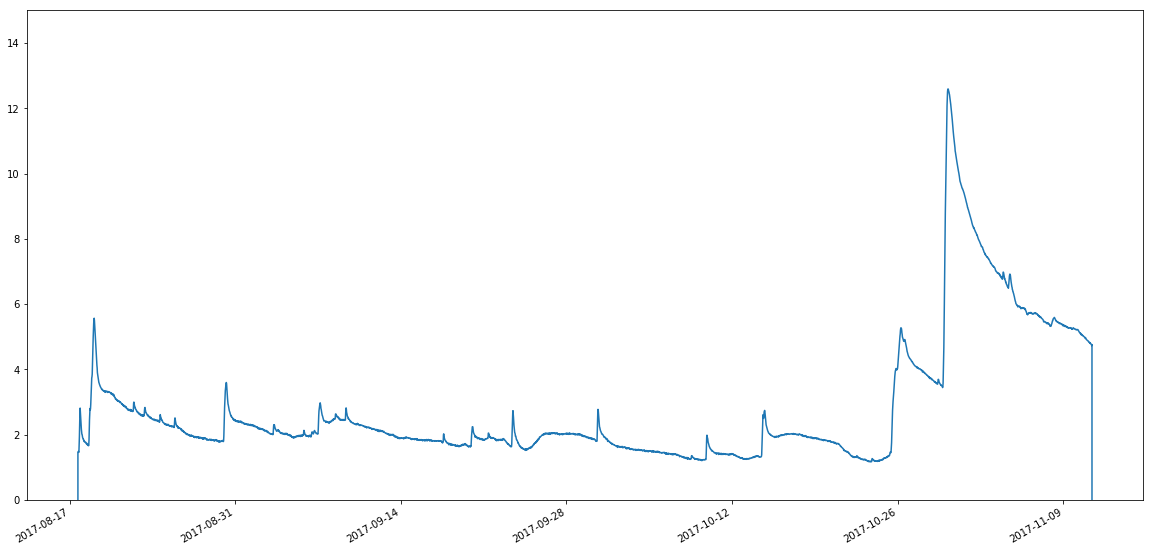

In [19]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(well56['GW_elevation_ft_(LSML)'])
fig.autofmt_xdate()
plt.ylim(0,15)

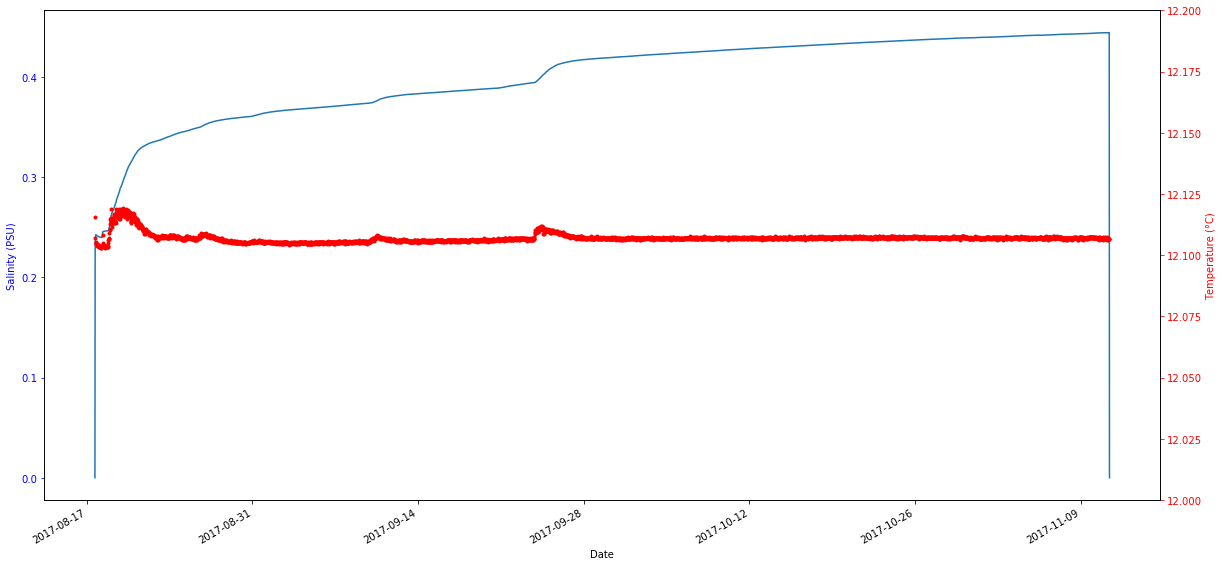

In [20]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(well56['Salinity (PSU) (534396)'])
ax1.set_xlabel('Date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Salinity (PSU)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = well56['Temperature (°C) (534396)']
ax2.plot(s2, 'r.')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params('y', colors='r')
plt.ylim(12,12.2)

fig.autofmt_xdate()
fig.autofmt_xdate()
plt.show()

### Fetching Precipitation from Wunderground
modified from https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/  

we are going to use this https://www.wunderground.com/personal-weather-station/dashboard?ID=KRIPORTS37#history/s20171019/e20171118/mmonth weather station

In [21]:
import requests
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time
import io

In [22]:
def getRainfallData(station, day, month, year):
    """
    Function to return a data frame of minute-level weather data for a single Wunderground PWS station.
    
    Args:
        station (string): Station code from the Wunderground website
        day (int): Day of month for which data is requested
        month (int): Month for which data is requested
        year (int): Year for which data is requested
    
    Returns:
        Pandas Dataframe with weather data for specified station and date.
    """
    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # Request data from wunderground data
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    # remove the excess <br> from the text data
    data = data.replace('<br>', '')
    # Convert to pandas dataframe (fails if issues with weather station)
    try:
        dataframe = pd.read_csv(io.StringIO(data), index_col=False)
        dataframe['station'] = station
    except Exception as e:
        print("Issue with date: {}-{}-{} for station {}".format(day,month,year, station))
        return None
    return dataframe

In [23]:
# Generate a list of all of the dates we want data for
start_date = "2017-08-01"
end_date = "2017-11-17"
start = parser.parse(start_date)
end = parser.parse(end_date)
dates = list(rrule.rrule(rrule.DAILY, dtstart=start, until=end))

# Create a list of stations here to download data for
stations = ["KRIPORTS37"]
# Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}

In [24]:
# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = []
    for date in dates:
        # Print period status update messages
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getRainfallData(station, date.day, date.month, date.year)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(10)
        # Add each processed date to the overall data
        data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    pd.concat(data[station]).to_csv("./{}_weather.csv".format(station))

Working on KRIPORTS37
Issue with date: 1-8-2017 for station KRIPORTS37
Issue with date: 2-8-2017 for station KRIPORTS37
Issue with date: 3-8-2017 for station KRIPORTS37
Issue with date: 4-8-2017 for station KRIPORTS37
Issue with date: 5-8-2017 for station KRIPORTS37
Issue with date: 6-8-2017 for station KRIPORTS37
Issue with date: 7-8-2017 for station KRIPORTS37
Issue with date: 8-8-2017 for station KRIPORTS37
Issue with date: 9-8-2017 for station KRIPORTS37
Working on date: 2017-08-10 00:00:00 for station KRIPORTS37
Issue with date: 10-8-2017 for station KRIPORTS37
Issue with date: 11-8-2017 for station KRIPORTS37
Issue with date: 12-8-2017 for station KRIPORTS37
Issue with date: 13-8-2017 for station KRIPORTS37
Issue with date: 14-8-2017 for station KRIPORTS37
Issue with date: 15-8-2017 for station KRIPORTS37
Issue with date: 16-8-2017 for station KRIPORTS37
Issue with date: 17-8-2017 for station KRIPORTS37
Issue with date: 18-8-2017 for station KRIPORTS37
Issue with date: 19-8-2017 

In [25]:
station = 'KRIPORTS37' # Sandy Point Farm, across the channel from Fogland Point
data_raw = pd.read_csv('./{}_weather.csv'.format(station))
data_raw.columns

Index(['Unnamed: 0', 'Time', 'TemperatureF', 'DewpointF', 'PressureIn',
       'WindDirection', 'WindDirectionDegrees', 'WindSpeedMPH',
       'WindSpeedGustMPH', 'Humidity', 'HourlyPrecipIn', 'Conditions',
       'Clouds', 'dailyrainin', 'SolarRadiationWatts/m^2', 'SoftwareType',
       'DateUTC', 'station'],
      dtype='object')

In [26]:
# Give the variables some friendlier names and convert types as necessary.
data_raw['temp'] = data_raw['TemperatureF'].astype(float)
data_raw['rain'] = data_raw['HourlyPrecipIn'].astype(float)
data_raw['date'] = data_raw['DateUTC'].apply(parser.parse)
data_raw['humidity'] = data_raw['Humidity'].astype(float)
data_raw['wind_direction'] = data_raw['WindDirectionDegrees']
data_raw['wind'] = data_raw['WindSpeedMPH']
 
# Extract out only the data we need.
data = data_raw.loc[:, ['date', 'station', 'temp', 'rain', 'humidity', 'wind']]
data = data[(data['date'] >= datetime(2017,8,2)) & (data['date'] <= datetime(2017,11,16))]
 
# There's an issue with some stations that record rainfall ~-2500 where data is missing.
if (data['rain'] < -500).sum() > 10:
    print("There's more than 10 messed up days for {}".format(station))
    
# remove the bad samples
data = data[data['rain'] > -500]
 
# Assign the "day" to every date entry
data['day'] = data['date'].apply(lambda x: x.date())
 
# Get the time, day, and hour of each timestamp in the dataset
data['time_of_day'] = data['date'].apply(lambda x: x.time())
data['day_of_week'] = data['date'].apply(lambda x: x.weekday())    
data['hour_of_day'] = data['time_of_day'].apply(lambda x: x.hour)
# Mark the month for each entry so we can look at monthly patterns
data['month'] = data['date'].apply(lambda x: x.month)

What does this data look like?

In [27]:
#! cat KRIPORTS37_weather.csv

In [28]:
data_raw['Datetime'] = pd.to_datetime(data_raw['Time'])
data_raw = data_raw.set_index('Datetime')
data_raw

,Unnamed: 0,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,...,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station,temp,rain,date,humidity,wind_direction,wind
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-20 00:05:00,0,2017-08-20 00:05:00,71.4,12.0,29.87,SSW,200,2.2,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:05:00,KRIPORTS37,71.4,0.0,2017-08-20 04:05:00,10.0,200,2.2
2017-08-20 00:10:00,1,2017-08-20 00:10:00,71.4,12.0,29.87,WSW,242,2.2,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:10:00,KRIPORTS37,71.4,0.0,2017-08-20 04:10:00,10.0,242,2.2
2017-08-20 00:15:00,2,2017-08-20 00:15:00,71.6,12.2,29.88,SW,217,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:15:00,KRIPORTS37,71.6,0.0,2017-08-20 04:15:00,10.0,217,1.3
2017-08-20 00:20:00,3,2017-08-20 00:20:00,71.4,12.0,29.87,SW,217,1.1,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:20:00,KRIPORTS37,71.4,0.0,2017-08-20 04:20:00,10.0,217,1.1
2017-08-20 00:25:00,4,2017-08-20 00:25:00,71.2,12.0,29.87,SW,214,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:25:00,KRIPORTS37,71.2,0.0,2017-08-20 04:25:00,10.0,214,1.3
2017-08-20 00:30:00,5,2017-08-20 00:30:00,71.2,12.0,29.88,SSW,209,0.7,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:30:00,KRIPORTS37,71.2,0.0,2017-08-20 04:30:00,10.0,209,0.7
2017-08-20 00:35:00,6,2017-08-20 00:35:00,71.2,12.0,29.87,SSW,209,2.9,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:35:00,KRIPORTS37,71.2,0.0,2017-08-20 04:35:00,10.0,209,2.9
2017-08-20 00:41:00,7,2017-08-20 00:41:00,71.2,12.0,29.87,SSW,209,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:41:00,KRIPORTS37,71.2,0.0,2017-08-20 04:41:00,10.0,209,1.3
2017-08-20 00:46:00,8,2017-08-20 00:46:00,71.2,12.0,29.87,SSW,209,0.7,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-20 04:46:00,KRIPORTS37,71.2,0.0,2017-08-20 04:46:00,10.0,209,0.7


In [29]:
data_raw = data_raw.drop(('Time'), 1)
data_raw = data_raw.drop(('Unnamed: 0'), 1)
data_raw.columns

Index(['TemperatureF', 'DewpointF', 'PressureIn', 'WindDirection',
       'WindDirectionDegrees', 'WindSpeedMPH', 'WindSpeedGustMPH', 'Humidity',
       'HourlyPrecipIn', 'Conditions', 'Clouds', 'dailyrainin',
       'SolarRadiationWatts/m^2', 'SoftwareType', 'DateUTC', 'station', 'temp',
       'rain', 'date', 'humidity', 'wind_direction', 'wind'],
      dtype='object')

(736557.0, 736649.0)

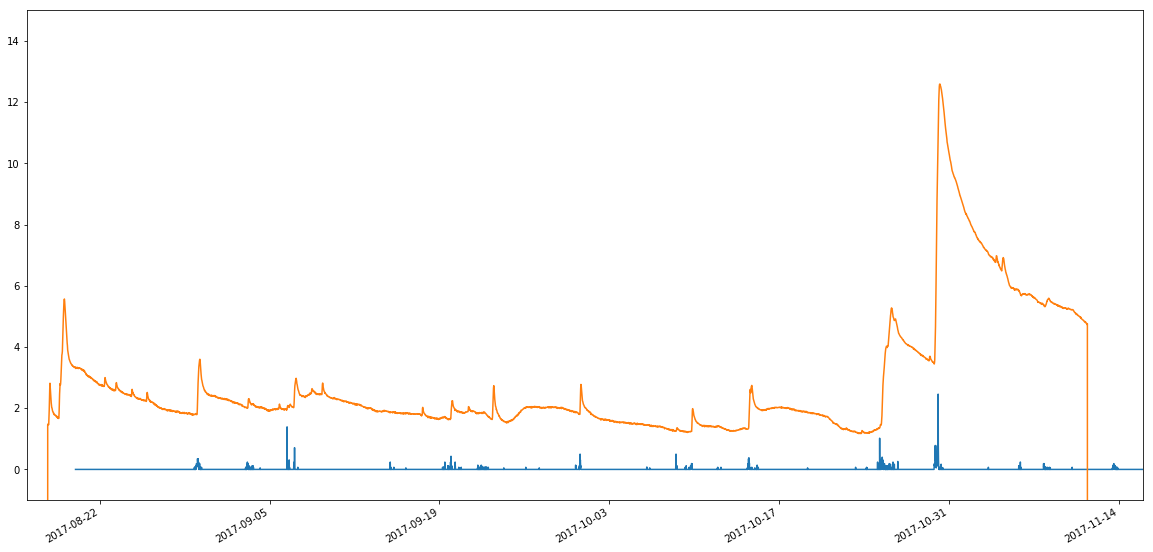

In [30]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

In [31]:
!ls -aF

./   .git/		  KRIPORTS37_weather.csv  Well55a.ipynb
../  .ipynb_checkpoints/  Well33.ipynb		  Well56.ipynb


**Lets try and see if tidal patterns have any effect on our transducer data**

In [32]:
%pwd

'/home/sbhgeo/Documents/Fogland/Notebooks/Transducer_Data/Fogland'

### fetching data from NOAA/CO-OPS via the [Data API](https://tidesandcurrents.noaa.gov/api/) 
specifically I am getting data from station [8452660](https://tidesandcurrents.noaa.gov/waterlevels.html?id=8452660&units=standard&bdate=20170501&edate=20171120&timezone=LST/LDT&datum=STND&interval=h&action=data)  
Note that we dont have the *Verified* (`tydl_wl_data`) data for November...seems like the data is updated monthly? we will have to use the predicted values from `tydl_pred_data`

In [33]:
tidal_water_levels = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&format=csv'
tidal_predictions = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&interval=h&format=csv'

In [34]:
tydl_wl_data = pd.read_csv(tidal_water_levels, delimiter=',')
tydl_pred_data = pd.read_csv(tidal_predictions, delimiter=',')

In [35]:
print(tydl_wl_data.columns)
print(tydl_pred_data.columns)

Index(['Date Time', ' Water Level', ' Sigma', ' I', ' L '], dtype='object')
Index(['Date Time', ' Prediction'], dtype='object')


In [36]:
tydl_wl_data['Datetime'] = pd.to_datetime(tydl_wl_data['Date Time'])
tydl_wl_data = tydl_wl_data.set_index('Datetime')
tydl_wl_data.rename(columns={' Water Level': 'Water Level'}, inplace=True)
tydl_wl_data = tydl_wl_data.drop(('Date Time'), 1)

tydl_pred_data['Datetime'] = pd.to_datetime(tydl_pred_data['Date Time'])
tydl_pred_data = tydl_pred_data.set_index('Datetime')
tydl_pred_data.rename(columns={' Prediction': 'Prediction'}, inplace=True)
tydl_pred_data = tydl_pred_data.drop(('Date Time'), 1)

#write a for-loop for the above?

(736557.0, 736649.0)

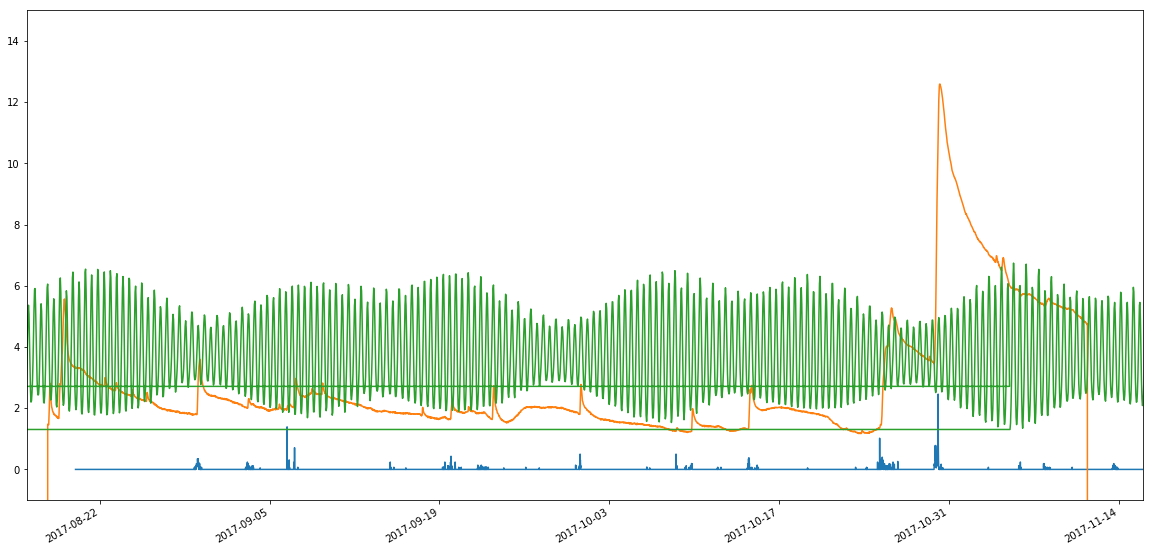

In [37]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_pred_data['Prediction'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736557.0, 736649.0)

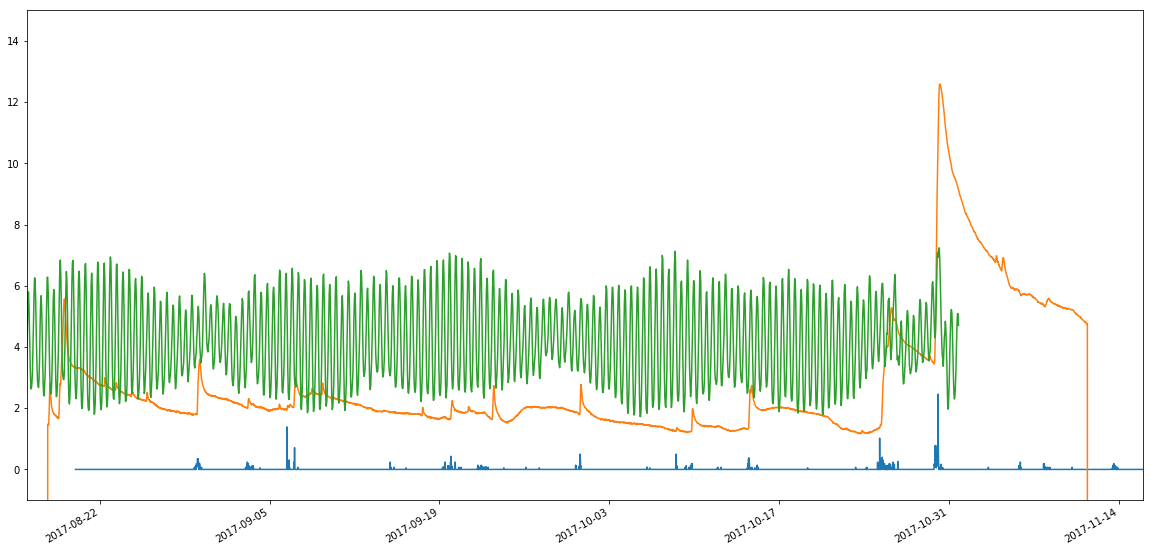

In [38]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736626.0, 736633.0)

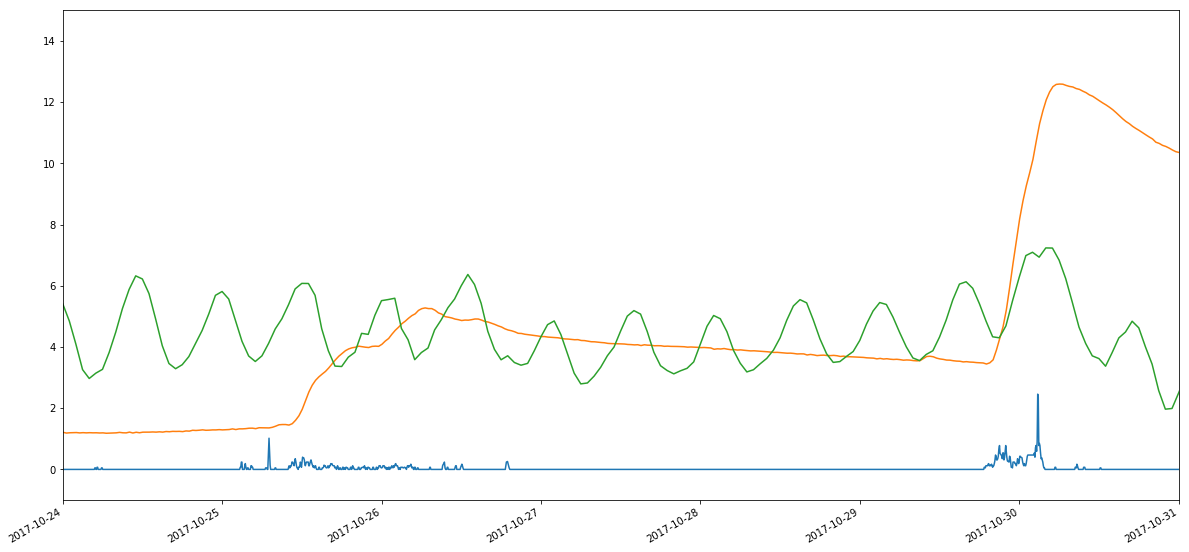

In [39]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well56['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-10-24','2017-10-31'])

#### Stripping off index and irrelevant data before analysis continues

In [56]:
def prep4analysis(originaldataframe):
    new = (originaldataframe)
    new = new.reset_index()
    new = new.drop('Datetime', axis =1)
    new = new[3:-3] #removing first and last 3 readings
    new_array = np.array(new)
    new_array = np.reshape(new_array, new_array.shape[0])
    return new, new_array

In [70]:
wl_56 = (well56['GW_elevation_ft_(LSML)'])
wl_56, wl_56a = prep4analysis(wl_56)

tmp_56 = (well56['Temperature (°C) (534396)'])
tmp_56, tmp_56a = prep4analysis(tmp_56)

sal_56 = (well56['Salinity (PSU) (534396)'])
sal_56, sal_56a = prep4analysis(sal_56)

tydl = (tydl_wl_data['Water Level'])
tydl, tydl_a = prep4analysis(tydl)

In [63]:
wl_56a
print(wl_56.shape)
print(wl_56a.shape)

(4114, 1)
(4114,)


In [46]:
# for temperature data
#wl_56 = (well56['GW_elevation_ft_(LSML)'])
#wl_56 = wl_56.reset_index()
#wl_56 = wl_56.drop('Datetime', axis =1)
#wl_56 = wl_56[2:-3]
#wl_56a = np.array(wl_56)
#wl_56a = np.reshape(wl_56a, 4115)

## Running standard deviation

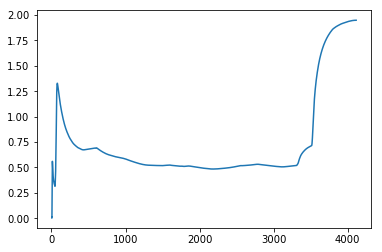

In [64]:
import pandas as pd
expand_std = wl_56.expanding(min_periods=1).std()
plt.plot(expand_std)
plt.show()

# FFT analysis with periodogram and welchs
nothing to look at yet...



## Water levels

Pxx_den shape: (2058,)
f shape: (2058,)


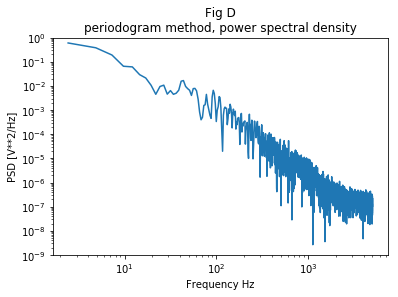

In [65]:
from scipy import signal
fs = 10e3
# x = Time series of measurement values
# fs = sampling frequency of the x time series in units of Hz
f, Pxx_den = signal.periodogram(wl_56a, fs)
# f = Array of sample frequencies 
# Pxx_den = Array of power spectral density or power spectrum of `x`.
print('Pxx_den shape:', Pxx_den.shape)
print('f shape:', f.shape)
plt.loglog(f, Pxx_den)
# frequency vs Power spectral density
plt.ylim([1e-9, 1])
plt.xlabel('Frequency Hz')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Fig D\nperiodogram method, power spectral density');

**Figure D.** Power spectral density graph for water levels at well 56. Lack of defined peaks suggestes that there the is no periodicity to the water levels at well 56. Well 56 is approximately 100 feet deep with the bottom of the well at approximately -75 feet LMSL. If there was tidal influence we would see a peak develop at a frequency corresponding to tidal periods. 

## Temp

Pxx_den shape: (2058,)
f shape: (2058,)


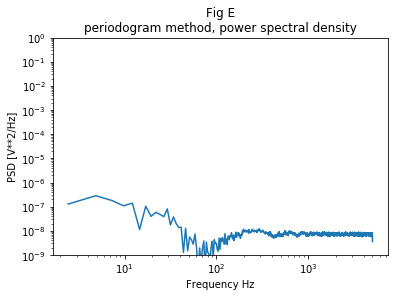

In [72]:
fs = 10e3
# x = Time series of measurement values
# fs = sampling frequency of the x time series in units of Hz
f, Pxx_den = signal.periodogram(tmp_56a, fs)
# f = Array of sample frequencies 
# Pxx_den = Array of power spectral density or power spectrum of `x`.
print('Pxx_den shape:', Pxx_den.shape)
print('f shape:', f.shape)
plt.loglog(f, Pxx_den)
# frequency vs Power spectral density
plt.ylim([1e-9, 1])
plt.xlabel('Frequency Hz')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Fig E\nperiodogram method, power spectral density');

## Salinity

Pxx_den shape: (2058,)
f shape: (2058,)


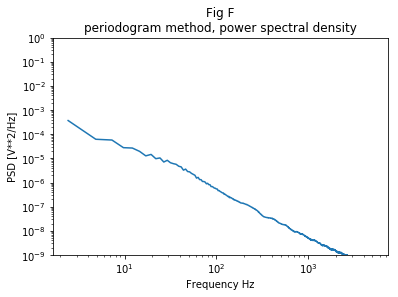

In [73]:
fs = 10e3
# x = Time series of measurement values
# fs = sampling frequency of the x time series in units of Hz
f, Pxx_den = signal.periodogram(sal_56a, fs)
# f = Array of sample frequencies 
# Pxx_den = Array of power spectral density or power spectrum of `x`.
print('Pxx_den shape:', Pxx_den.shape)
print('f shape:', f.shape)
plt.loglog(f, Pxx_den)
# frequency vs Power spectral density
plt.ylim([1e-9, 1])
plt.xlabel('Frequency Hz')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Fig F\nperiodogram method, power spectral density');

## Tides

Pxx_den shape: (2204,)
f shape: (2204,)


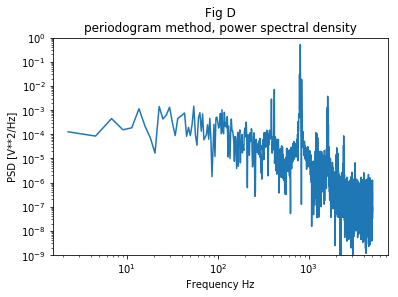

In [74]:
fs = 10e3
# x = Time series of measurement values
# fs = sampling frequency of the x time series in units of Hz
f, Pxx_den = signal.periodogram(tydl_a, fs)
# f = Array of sample frequencies 
# Pxx_den = Array of power spectral density or power spectrum of `x`.
print('Pxx_den shape:', Pxx_den.shape)
print('f shape:', f.shape)
plt.loglog(f, Pxx_den)
# frequency vs Power spectral density
plt.ylim([1e-9, 1])
plt.xlabel('Frequency Hz')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Fig D\nperiodogram method, power spectral density');

# All together now

In [75]:
from scipy import signal

def Periodogram_loglog_plot(x,fs):
    f, Pxx_den = signal.periodogram(x,fs)
    plt.loglog(f, Pxx_den)
    plt.xlabel('Frequency Hz')
    plt.ylabel('PSD [V**2/Hz]')
    plt.title('Fig D\nperiodogram method, power spectral density');

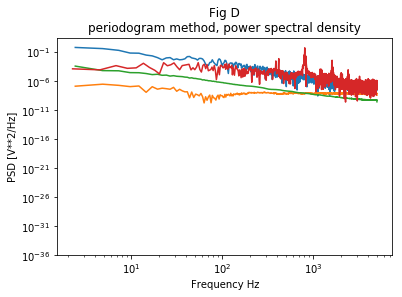

In [80]:
Periodogram_loglog_plot(wl_56a, 10e3)
Periodogram_loglog_plot(tmp_56a, 10e3)
Periodogram_loglog_plot(sal_56a, 10e3)
Periodogram_loglog_plot(tydl_a, 10e3)

AttributeError: 'numpy.ndarray' object has no attribute 'Periodogram_loglog_plot'

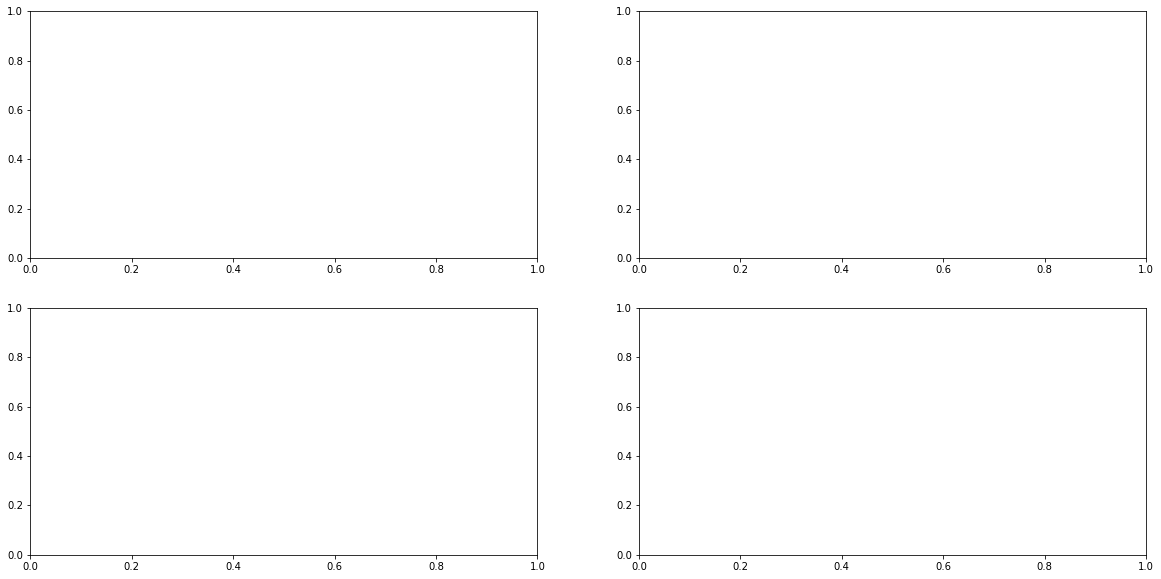

In [81]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes[0].Periodogram_loglog_plot(wl_56a, 10e3)
axes[1].Periodogram_loglog_plot(tmp_56a, 10e3)
#Periodogram_loglog_plot(sal_56a, 10e3)
#Periodogram_loglog_plot(tydl_a, 10e3)

## Welch's Method: Water Level

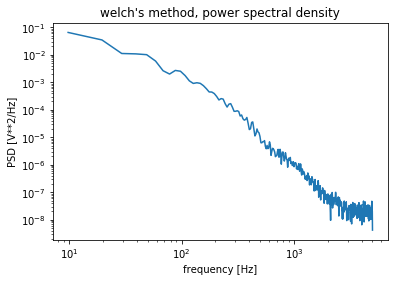

In [66]:
f, Pxx_den = signal.welch(wl_56a, fs, nperseg=1024)
plt.loglog(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('welch\'s method, power spectral density');

## Autocorrelation

## Water Level

In [67]:
fft = np.fft

def autocorrelation(x):
    """
    Compute autocorrelation using FFT
    The idea comes from 
    http://dsp.stackexchange.com/a/1923/4363 (Hilmar)
    """
    x = np.asarray(x)
    N = len(x)
    x = x-x.mean()
    s = fft.fft(x, N*2-1)
    result = np.real(fft.ifft(s * np.conjugate(s), N*2-1))
    result = result[:N]
    result /= result[0]
    return result

In [68]:
AC = autocorrelation(wl_56a)

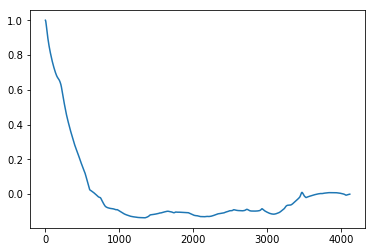

In [69]:
plt.plot(AC)